   # Linear Regression
   


   - Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is 
     used for predictive analysis.
     
     
   - Linear regression makes predictions for continuous/real or numeric variables such as " sales, salary, age, product, price,
     etc".
  
  
   - Linear regression alogorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, 
     hence called as linear regression.
     
     
   - Since linear regression shows the linear relationship, which means it finds how the valueof the dependent variable is            changing according to the value of the independent variable.
   
   
   - The linear regression model provides a sloped stright line representing the relationship between the variables. 
       
       
       - consider the below image..
   

<img src ="https://higherlogicdownload.s3.amazonaws.com/IMWUC/UploadedImages/92757287-d116-4157-b004-c2a0aba1b048/linear-regression-in-machine-learning.png"/>

# Y - predicted:-

$$y = m*x+c$$

## Finding m value:-

$$m = \frac{(n * \sum_{i=0}^{n} X_{i} * Y_{i}) - (\sum_{i=0}^{n} X * \sum_{i=0}^{n} Y)}
{(n*\sum_{i=0}^{n}X^{2}) - (\sum_{i=0}^{n}X)^2}$$

## Finding b value:-

$$b = \frac{n * \sum_{i=0}^{n} Y_{i} - m*(\sum_{i=0}^{n} X_{i}}
n$$

# MSE(Mean square error):-

  * Mean square error (MSE) is defined as Mean or Average of the square of the difference between 
    actual and estimated values.


$$MSE = \frac{1}
n
\sum_{i=0}^{n}( Y_{org} -  Y_{pred})^2 $$


# MAE(Mean absolute error):-
 
 
 * Mean absolute error (MAE) is the sum of the absolute difference between actual and predicted values.

$$MAE =\frac{ \sum_{i=0}^{n} \left| Y_{org} - Y_{pred}\right|}
n
 $$

In [1]:
import numpy as np
import pandas as pd

In [2]:
# to define data

data = { "x" : list(range(1,8)),
         "y" : [1.5,3.8,6.7,9.0,11.2,13.6,16]
       }

In [3]:
data


{'x': [1, 2, 3, 4, 5, 6, 7], 'y': [1.5, 3.8, 6.7, 9.0, 11.2, 13.6, 16]}

In [4]:
# convert data into dataframe

df = pd.DataFrame(data)

In [5]:
df

,x,y
0,1,1.5
1,2,3.8
2,3,6.7
3,4,9.0
4,5,11.2
5,6,13.6
6,7,16.0


In [6]:
len(df)

7

In [7]:
# to add the column xy

df['xy'] = df['x'] * df['y']
df

,x,y,xy
0,1,1.5,1.5
1,2,3.8,7.6
2,3,6.7,20.1
3,4,9.0,36.0
4,5,11.2,56.0
5,6,13.6,81.6
6,7,16.0,112.0


In [8]:
# to add the column sruare of x --- sqr_x

df['sqr_x'] = df['x'] ** 2
df

,x,y,xy,sqr_x
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.0,36.0,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


In [9]:
n = len(df)
sum_x = df['x'].sum()
sum_y = df['y'].sum()
sum_xy = df['xy'].sum()
sum_sqr_x = df['sqr_x'].sum()
sum_whl_sqrx = sum_x ** 2
        

In [10]:
n, sum_x, sum_y, sum_xy, sum_sqr_x, sum_whl_sqrx

(7, 28, 61.800000000000004, 314.8, 140, 784)

In [11]:
num_m = n*((sum_xy)) - (sum_x)*(sum_y)
den_m = n*((sum_sqr_x)) - (sum_whl_sqrx)
m = num_m / den_m

In [12]:

print("m value is :",m)

m value is : 2.4142857142857133


In [14]:
num_b = (sum_y) - m*(sum_x)
den_b = n
b = num_b / den_b
        

In [15]:
print("b value is:",b)

b value is: -0.8285714285714231


In [21]:
y_org = df['y']
y_org

0     1.5
1     3.8
2     6.7
3     9.0
4    11.2
5    13.6
6    16.0
Name: y, dtype: float64

In [24]:
df['y_pred'] = [(m*x_val) + b for x_val in df['x']]
print("y predict value is: ",y_pred)
df

y predict value is:  [1.5857142857142903, 4.0000000000000036, 6.414285714285717, 8.82857142857143, 11.242857142857142, 13.657142857142857, 16.07142857142857]


,x,y,xy,sqr_x,y_org,y_pred
0,1,1.5,1.5,1,1.5,1.585714
1,2,3.8,7.6,4,3.8,4.000000
2,3,6.7,20.1,9,6.7,6.414286
3,4,9.0,36.0,16,9.0,8.828571
4,5,11.2,56.0,25,11.2,11.242857
5,6,13.6,81.6,36,13.6,13.657143
6,7,16.0,112.0,49,16.0,16.071429


In [33]:
diff1 = []
for y_org, y_pre in zip(df['y'],y_pred):
    
    diff = (y_org - y_pre) ** 2
    diff1.append(diff)
sse = sum(diff1)        
mse = (1/n) * (sse)

In [34]:
print("MSE :",mse)

MSE : 0.024081632653061246


In [35]:
diff1 =[]
for y_org, y_pre in zip(df['y'],y_pred):
    diff = abs(y_org - y_pre)    # here abs for modulus
    diff1.append(diff)
ae = sum(diff1)
mae = ae / n

In [36]:
print("MAE :",mae)

MAE : 0.13061224489795956


In [37]:
# using class we define all the values

        
class Linear_Regression:
    
    def __init__(self,df):
        self.n = len(df)
        self.sum_x = df['x'].sum()
        self.sum_y = df['y'].sum()
        self.sum_xy = df['xy'].sum()
        self.sum_sqr_x = df['sqr_x'].sum()
        self.sum_whl_sqrx = sum_x ** 2
        
        
        
    def m_val(self,n,sum_x,sum_y,sum_xy,sum_sqr_x,sum_whl_sqrx):  # to find m value
        self.num_m = n*((sum_xy)) - (sum_x)*(sum_y)
        self.den_m = n*((sum_sqr_x)) - (sum_whl_sqrx)
        self.m = self.num_m / self.den_m
        return self.m
    
    def b_val(self,n, sum_x, sum_y):   # to find b value
        self.num_b = (sum_y) - m*(sum_x)
        self.den_b = n
        self.b = self.num_b / self.den_b
        return self.b
    
    def fit_train(self,m,b,df):   # to find y predicted value --y_pred = mx +c
        self.y_pred = [(m*x_val) + b for x_val in df['x']]
        return self.y_pred
    
    def mse_val(self,df,y_pred):   # to find the mean square error
        diff1 = []
        for y_org, y_pre in zip(df['y'],y_pred):
            diff = (y_org - y_pre) ** 2
            diff1.append(diff)
        sse = sum(diff1)        
        mse = (1/n) * (sse)
        return mse
    
    def mae_val(self,df,y_pred):   # to find mean absolute error
        diff1 =[]
        for y_org, y_pre in zip(df['y'],y_pred):
            diff = abs(y_org - y_pre)    # here abs for modulus
            diff1.append(diff)
        ae = sum(diff1)
        mae = ae / n
        return mae
    
 

In [26]:
# to print m value

m_obj = Linear_Regression(df)     # object declaration for m means slope
m_obj.m_val(n,sum_x,sum_y,sum_xy,sum_sqr_x,sum_whl_sqrx)  # obj. methodname()
print('m value :', m)

m value : 2.4142857142857133


In [27]:
# to print b value

b_obj = Linear_Regression(df)
b_obj.b_val(n, sum_x, sum_y)
print('b value is :',b)

b value is : -0.8285714285714231


In [29]:
# to print y predict value

y_pred_obj = Linear_Regression(df)
y_pred_obj.fit_train(m,b,df)
print('y predict value is:',y_pred)

y predict value is: [1.5857142857142903, 4.0000000000000036, 6.414285714285717, 8.82857142857143, 11.242857142857142, 13.657142857142857, 16.07142857142857]


In [38]:
mse_obj = Linear_Regression(df)
mse_obj.mse_val(df,y_pred)
print('Mean square error is :',mse)

Mean square error is : 0.024081632653061246


In [39]:
mae_obj = Linear_Regression(df)
mae_obj.mae_val(df,y_pred)
print('Mean absolute error is :',mae)

Mean absolute error is : 0.13061224489795956


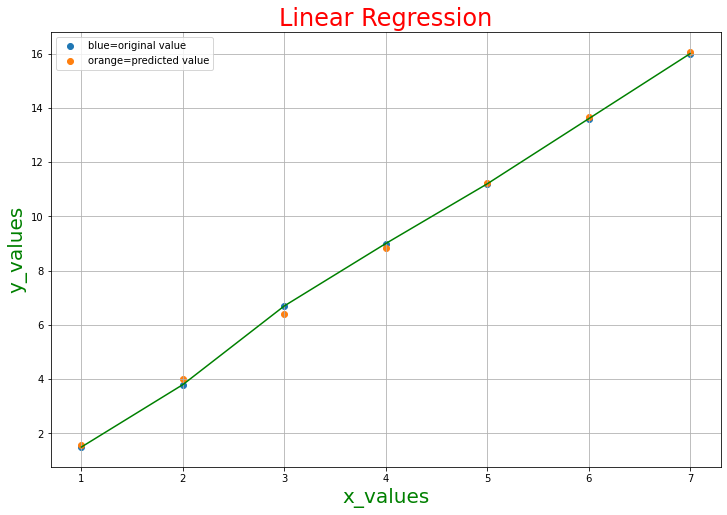

In [55]:
# data visualization...

import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

x_val = df['x']
y_org = df['y']
y_pred = y_pred

plt.plot(x_val,y_org,color='g')
plt.scatter(x_val,y_org,label='blue=original value')
plt.scatter(x_val,y_pred,label='orange=predicted value')
plt.title('Linear Regression',size = 24,color='red')
plt.xlabel('x_values',fontdict={'color':'green','size':20})
plt.ylabel('y_values',fontdict={'color':'green','size':20})
plt.legend()
plt.grid()
plt.show()